# Pyber Ride Sharing

<h3>Analysis</h3>

-Rural Fares tend to have higher average fares but make up a small proportion of overall revenue.

-Drivers are heavily centered in urban areas and this may have a negative effect on average fares in this area.

-Despite the lower average fares, urban areas account for 63% of total revenue.

In [35]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

city_data = "city_data.csv"
city_data  = pd.read_csv(city_data)
ride_data = "ride_data.csv"
ride_data = pd.read_csv(ride_data)

avg_fare = ride_data.groupby(["city"])["fare"].mean()

avg_fare = pd.DataFrame(avg_fare).rename(columns={"fare": "Average Fare"}).reset_index()
total_rides = ride_data.groupby(["city"])["ride_id"].count()
total_rides = pd.DataFrame(total_rides).rename(columns={"ride_id": "Total Number of Rides"}).reset_index()
driver_count = city_data.groupby(["city", "type"])["driver_count"].sum()
driver_count = pd.DataFrame(driver_count).rename(columns={"driver_count": "Driver Count"}).reset_index()

df1 = pd.merge(total_rides, avg_fare,how="inner",on="city")
df2 = pd.merge(df1, driver_count,how="inner",on=
                         "city").rename(columns={"city": "City","type": "City Type"})

df3=df2[["City", "Average Fare", "Total Number of Rides",  "Driver Count", "City Type"]]

df3['Average Fare']=df3['Average Fare'].map("${:,.2f}".format)

df3.head()

,City,Average Fare,Total Number of Rides,Driver Count,City Type
0,Alvarezhaven,$23.93,31,21,Urban
1,Alyssaberg,$20.61,26,67,Urban
2,Anitamouth,$37.32,9,16,Suburban
3,Antoniomouth,$23.62,22,21,Urban
4,Aprilchester,$21.98,19,49,Urban


<h3>Bubble Plot of Ride Sharing Data</h3>

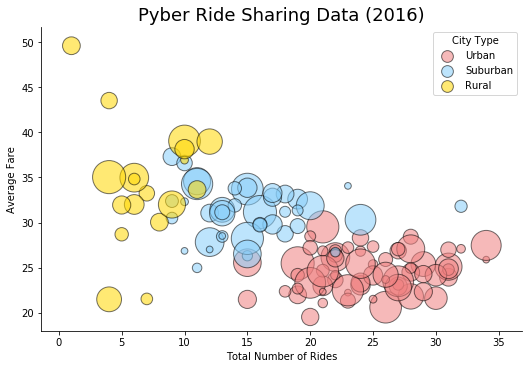

In [40]:
clrlist = ["lightcoral", "lightskyblue", "gold"]
sns.set_palette(clrlist)

sns.lmplot(x="Total Number of Rides", y="Average Fare", data= df2, 
           hue="City Type",  size=5, aspect=1.5 ,
           legend_out = False, legend = True, 
           scatter_kws={"s":df2["Driver Count"]*15, 
                        'alpha':.55,'edgecolors':"black", 'linewidth':1},ci=0, fit_reg=False, )

plt.legend(loc="upper right", markerscale=.5, title="City Type", fontsize=10, frameon=True)
plt.title("Pyber Ride Sharing Data (2016)", fontsize=18)

plt.show()

<h3>Total Fares by City Type</h3>

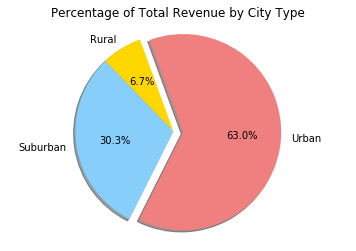

In [51]:
pie_ct = pd.merge(city_data, ride_data,how="inner",on="city")
pie_ct = pie_ct.groupby(["type"])["fare"].sum()

cities=["Rural","Suburban","Urban"]
colors = ["gold","lightskyblue","lightcoral"]

explode = (0,0,.1)
plt.pie(pie_ct_fare, labels=cities, explode=explode,labeldistance=1.1,
        autopct="%1.1f%%", colors=colors, shadow=True, startangle=110)
plt.axis("equal")
plt.title("Percentage of Total Revenue by City Type", fontsize=12)


plt.show()

<h3>Total Rides by City Type</h3>

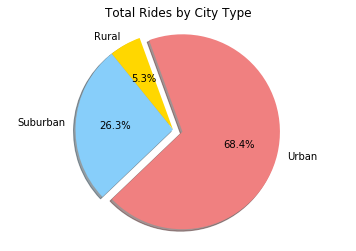

In [45]:
pie_tr = pd.merge(city_data, ride_data,how="inner",on="city")
pie_tr = pie_tr.groupby(["type"])["ride_id"].count()

explode = (0,0,.1)
plt.pie(pie_tr, labels=cities, explode=explode,labeldistance=1.1,
        autopct="%1.1f%%", colors=colors, shadow=True, startangle=110)
plt.axis("equal")
plt.title("Total Rides by City Type", fontsize=12)

plt.show()

<h3>Total Drivers by City Type</h3>

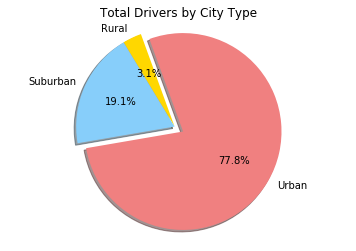

In [49]:
pie_td = pd.merge(city_data, ride_data,how="inner",on="city")
pie_td = pie_td.drop_duplicates(['city'])

pie_td = pie_td.groupby(['type'])['driver_count'].sum()

explode = (0,0,.1)
plt.pie(pie_td, labels=cities, explode=explode,labeldistance=1.1,
        autopct="%1.1f%%", colors=colors, shadow=True, startangle=110)
plt.axis("equal")
plt.title("Total Drivers by City Type", fontsize=12)

plt.show()